## Model for TFIDF

## Model for Word2Vec

## Model for BERT

In [3]:
# read the embeddings from a file
word_embeddings = np.load('./data/word_embeddings.npy')
word_embeddings

array([[[-1.12394623e-01,  2.43574202e-01,  8.56041908e-02, ...,
         -5.61490059e-02,  2.55643148e-02,  1.89277261e-01],
        [-1.20661907e-01,  1.10852040e-01, -3.84405851e-01, ...,
          3.11314501e-02,  5.34860082e-02, -1.78563982e-01],
        [ 1.34441257e-01, -2.87240803e-01,  3.97187293e-01, ...,
         -7.56842270e-02, -3.69139045e-01, -8.71829391e-02],
        ...,
        [ 2.17013896e-01, -3.88921052e-01,  1.67330772e-01, ...,
          2.04482481e-01, -1.21963292e-01,  2.04405755e-01],
        [ 1.53140808e-02, -1.72498614e-01,  4.91093040e-01, ...,
          3.58683407e-01, -6.87737241e-02, -1.02995254e-01],
        [ 5.70772029e-03, -7.48095214e-02,  2.62709726e-02, ...,
          1.83334380e-01, -1.89989544e-02, -2.10646093e-01]],

       [[ 3.18950355e-01,  2.68945128e-01,  1.25845775e-01, ...,
         -6.24325633e-01, -5.16040102e-02,  5.12888655e-04],
        [ 5.01378357e-01,  1.31020904e-01,  3.11420858e-01, ...,
         -1.42548949e-01, -2.16965199e

In [4]:
# read csv file
import pandas as pd
df = pd.read_csv('./data/labeled_texts_1000.csv')
df.dropna(inplace=True)
y = df['label']

## SVM

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(word_embeddings, y, test_size=0.2, random_state=42)


In [7]:
# Average the word embeddings for each text sample
X_avg = word_embeddings.mean(axis=1)

In [8]:
# Now, you can split your data
X_train, X_test, y_train, y_test = train_test_split(X_avg, y, test_size=0.2, random_state=42)

In [9]:
# import svm

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = clf.predict(X_test)

Accuracy: 0.700507614213198
Confusion Matrix:
 [[21 12  4]
 [ 9 79 17]
 [ 1 16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        37
           1       0.74      0.75      0.75       105
           2       0.64      0.69      0.67        55

    accuracy                           0.70       197
   macro avg       0.69      0.67      0.68       197
weighted avg       0.70      0.70      0.70       197



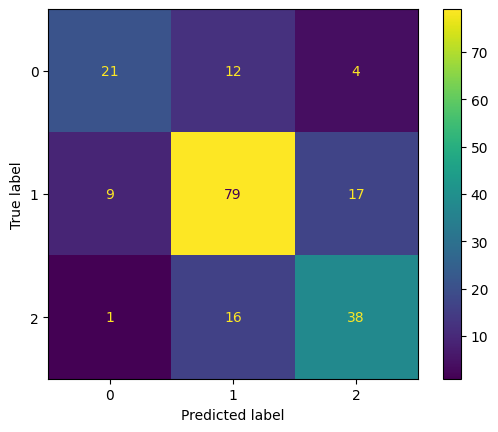

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
conf_matrix_display.plot()
# Detailed classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


### Hyper-Parameter Tuning and Cross Validation

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Grid search with 10-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # Set cv=10 for 10-fold CV
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.

Accuracy: 0.7258883248730964
Confusion Matrix:
 [[20 14  3]
 [ 5 85 15]
 [ 1 16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.54      0.63        37
           1       0.74      0.81      0.77       105
           2       0.68      0.69      0.68        55

    accuracy                           0.73       197
   macro avg       0.73      0.68      0.70       197
weighted avg       0.73      0.73      0.72       197



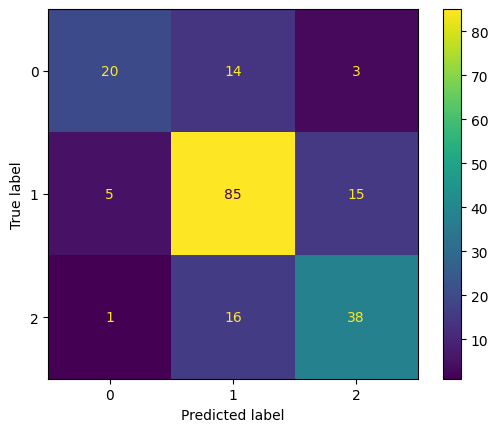

In [18]:
# show the confusion matrix
y_pred = grid.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
conf_matrix_display.plot()
# Detailed classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

## LSTM

In [19]:
from tensorflow.keras.utils import to_categorical

# Assuming 'y' contains integer labels for categories
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(word_embeddings, y, test_size=0.2, random_state=42)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow import keras

num_classes = y_train_encoded.shape[1]  # Number of unique classes

model = Sequential([
    LSTM(100, input_shape=(word_embeddings.shape[1], word_embeddings.shape[2])),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./models/best-lstm.keras",
      save_best_only=True,
      monitor="val_loss")
]

model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               347600    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 347,903
Trainable params: 347,903
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train_encoded,  # Use one-hot encoded labels
                    epochs=4,  # May need adjustment
                    batch_size=32,  # May need adjustment
                    validation_split=0.2,
                    callbacks=callbacks
                    )  # Fraction of data to use as validation


Epoch 1/4
20/20 [==============================] - 16s 629ms/step - loss: 0.8927 - accuracy: 0.5952 - val_loss: 0.7653 - val_accuracy: 0.6962
Epoch 2/4
20/20 [==============================] - 13s 664ms/step - loss: 0.5928 - accuracy: 0.7825 - val_loss: 0.6923 - val_accuracy: 0.7405
Epoch 3/4
20/20 [==============================] - 12s 601ms/step - loss: 0.4142 - accuracy: 0.8508 - val_loss: 0.5908 - val_accuracy: 0.7848
Epoch 4/4
20/20 [==============================] - 12s 614ms/step - loss: 0.3097 - accuracy: 0.8921 - val_loss: 0.6797 - val_accuracy: 0.7278


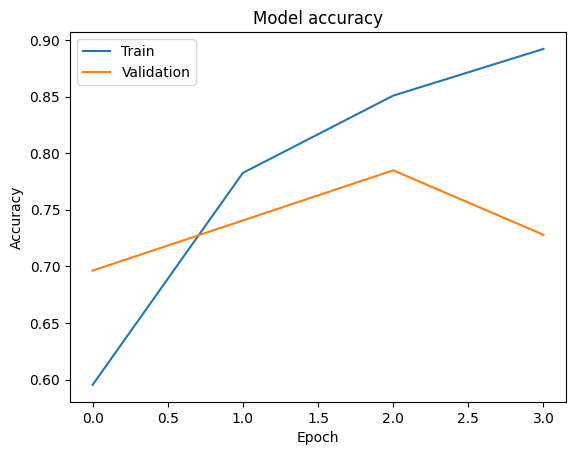

In [23]:
# plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
from keras.models import load_model

best_model = load_model('./models/best-lstm.keras')
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               347600    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 347,903
Trainable params: 347,903
Non-trainable params: 0
_________________________________________________________________


In [25]:
test_loss, test_acc = best_model.evaluate(X_test, y_test_encoded)
print('Test Accuracy:', test_acc)


7/7 [==============================] - 3s 267ms/step - loss: 0.6972 - accuracy: 0.7513
Test Accuracy: 0.7512690424919128


In [26]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

import keras_tuner as kt
import tensorflow as tf

def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.5))
    model.add(LSTM(50))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Tuning the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train, y_train_encoded, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


Trial 18 Complete [00h 02m 00s]
val_accuracy: 0.7784810066223145

Best val_accuracy So Far: 0.7911392450332642
Total elapsed time: 00h 10m 23s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 50 and the optimal learning rate for the optimizer
is 0.001.



In [27]:
# Retrieve the best model
best_tuner_model = tuner.get_best_models(num_models=1)[0]
best_tuner_model.summary()  


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 91, 100)          327600    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 91, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 357,953
Trainable params: 357,953
Non-trainable params: 0
__________________________________________________

In [28]:
# Making predictions
y_pred = best_tuner_model.predict(X_test)

# Since we're doing multi-class classification, 'y_pred' will contain probabilities for each class
# To convert these probabilities into class labels, you can use 'argmax' which returns the index of the maximum value

import numpy as np

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels


7/7 [==============================] - 2s 187ms/step


array([1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2],
      dtype=int64)

Test Accuracy: 0.6700507614213198
              precision    recall  f1-score   support

           0       0.67      0.54      0.60        37
           1       0.67      0.81      0.74       105
           2       0.66      0.49      0.56        55

    accuracy                           0.67       197
   macro avg       0.67      0.61      0.63       197
weighted avg       0.67      0.67      0.66       197

Confusion Matrix:
 [[20 16  1]
 [ 7 85 13]
 [ 3 25 27]]


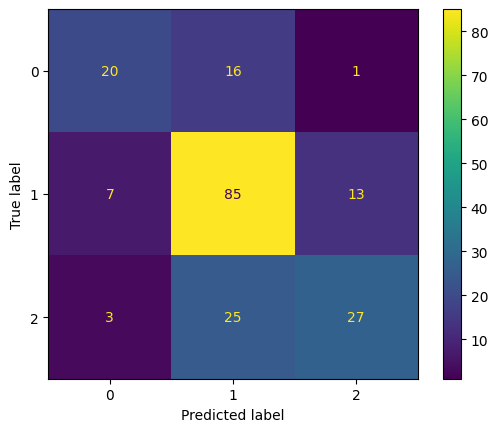

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'y_test' contains the actual labels
accuracy = accuracy_score(y_test, y_pred_labels)
print("Test Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:\n", conf_matrix)

conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_)
conf_matrix_display.plot()